# Accident Severity in Seattle from 2004 to 2020
## Introduction
### Problem background and description
Growth rate of population in Seattle ranks No.2 in US. As a fast growing city, the traffic congestion problems have become a terrible problem. Accourding to the 2019 Urban Mobility Report, Seattle rank 7th on the problem of time delay for auto commuters traveling during peak periods (6 a.m. to 10 a.m. and 3 p.m. to 7 p.m.). Increasing number of traffic accidents is one of the most contribution to traffic jams. If prediction of severity of traffic accidents can be made, traffic congestion problem can be relieved. 

With the development of machine learning, we want to use the data of traffic attributes including road condition, weather and other factors to predict accident severity  

### Target Audience
Our prediction of accident severity will be provided to the driver sufferred from traffic jams caused by traffic accidents and help them to decide whether they should change the routine or wait for the traffic jams. If the accident is serious and caused a large damage, we will recommend them to change their routine. Otherwise, they can still wait for traffic jams. Our prediction will help drivers to save their time and relieve traffic congestion.



## Data
### Data description
The data of severity of accident I used is from ArcGIS Metadata form. It concludes 194673 collisions happened in Seattle from 2004 to 2020. 37 attributes have been records on each collision. There are two kinds of severity have been recorded in this data set, injury and prop damage.

                                                                            

### Data features
There are several factors can be used to predict the sevrity of the collision: total number of vehicle involved in the collision, weather and road condition.
Using these factors, we can cluster the collision based on these factors whetherit is injury or drop damage using k-Means methods.

### Relations between number of vehicle and the severity of accidents
There are 172606 accidents have been recorded with known weather condition, road condition and number of vehicle. If the number of vehicle is high, we predict there will be a more serious accidents. We can see that, for all prop damage accidents, about 82% accidents with a vehicle number of 2. But for all injury accidents, 62% accidents with a vehicle number of 2. The fact indicates that severity is sensitive to the number of vehicle.

In [121]:
import pandas as pd
import numpy as np
dat = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/Users/ziyuli/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
dt = dat[['WEATHER','ROADCOND','VEHCOUNT','SEVERITYCODE']]
dt.drop(dt[dt['WEATHER']=='Unknown' ].index, inplace=True)
dt.drop(dt[dt['WEATHER']=='Other' ].index, inplace=True)
dt.drop(dt[dt['ROADCOND']=='Unknown' ].index, inplace=True)
dt.drop(dt[dt['ROADCOND']=='Other' ].index, inplace=True)
dt_clear=dt.dropna()
dt_clear


/Users/ziyuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ziyuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ziyuli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/U

,WEATHER,ROADCOND,VEHCOUNT,SEVERITYCODE
0,Overcast,Wet,2,2
1,Raining,Wet,2,1
2,Overcast,Dry,3,1
3,Clear,Dry,3,1
4,Raining,Wet,2,2
5,Clear,Dry,2,1
6,Raining,Wet,2,1
7,Clear,Dry,1,2
8,Clear,Dry,2,1
9,Clear,Dry,2,2


In [124]:
df = dt_clear.groupby(['SEVERITYCODE'])['VEHCOUNT'].value_counts(normalize=True)
df =df.to_frame()
df

VEHCOUNT
SEVERITYCODE VEHCOUNT          
1            2         0.828271
             1         0.094921
             3         0.062203
             4         0.011261
             5         0.002247
             6         0.000720
             7         0.000206
             8         0.000086
             0         0.000026
             9         0.000026
             11        0.000026
             12        0.000009
2            2         0.629062
             1         0.245393
             3         0.096725
             4         0.019106
             5         0.004607
             0         0.003375
             6         0.001053
             7         0.000393
             9         0.000107
             8         0.000089
             11        0.000054
             10        0.000036

## Features
All 194673 accidents have been related. 70% are prop damaged and 30% are injury. Here, we analyzed features that have the protential relations with the severity of accidents which are shown below:
1. COLLISIONTYPE:Collision type
2. PERSONCOUNT: The total number of people involved in the collisions.
3. JUNCTIONTYPE: Category of junction at which collision took place
4. INATTENTIONIND: Whether or not the collision was caused by the inattention
5. WEATHER: Weather condition 
6. ROADCOND: Road condition during the collision.
7. LIGHTCOND: Light condition during the collision.
8. SPEEDING: Whether or not speeding was a factor in the collision.


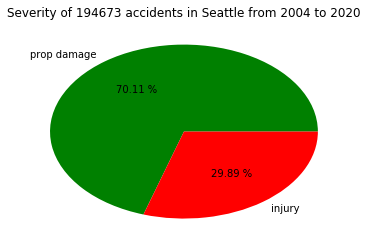

In [125]:
n1 = dat.loc[dat['SEVERITYCODE']==1].count()[0]
n2 = dat.loc[dat['SEVERITYCODE']==2].count()[0]

labels = ['prop damage','injury']
plt.pie([n1,n2],labels=labels,colors=['green','red'],autopct='%.2f %%')
plt.title('Severity of 194673 accidents in Seattle from 2004 to 2020')

plt.savefig('Total.png',dpi=300)


In [126]:
features = ['COLLISIONTYPE','PERSONCOUNT','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','LIGHTCOND','SPEEDING']

### COLLISIONTYPE
There are 10 types of collision types recorded in the data. From the data we shown below, we can see that Rear ended, Angles and other can be three main factor caused the injured collision. Parked car collision have a high potential to caused a prop damaged collision.

In [127]:
dat.groupby(['SEVERITYCODE'])['COLLISIONTYPE'].value_counts(normalize=True)

SEVERITYCODE  COLLISIONTYPE
1             Parked Car       0.341761
              Angles           0.158722
              Rear Ended       0.146424
              Other            0.132640
              Sideswipe        0.121420
              Left Turn        0.062524
              Right Turn       0.017697
              Head On          0.008686
              Pedestrian       0.005067
              Cycles           0.005059
2             Rear Ended       0.256724
              Angles           0.238403
              Other            0.106952
              Pedestrian       0.103872
              Left Turn        0.094686
              Cycles           0.083014
              Parked Car       0.046582
              Sideswipe        0.043852
              Head On          0.015259
              Right Turn       0.010657
Name: COLLISIONTYPE, dtype: float64

### PERSONCOUNT
We can see from the figure shown below, when accident with involved person number of 3 contributes to major accidents. For more serious accidents, high number of people involved in the accident showed a higher probability caused a more serious accident.

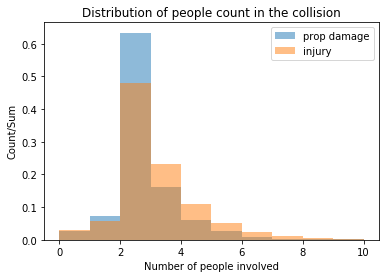

In [128]:
p1 = dat.loc[dat['SEVERITYCODE']==1,'PERSONCOUNT']

p2 = dat.loc[dat['SEVERITYCODE']==2,'PERSONCOUNT']

bins = [0,1,2,3,4,5,6,7,8,9,10]
plt.hist(p1,bins=bins,density=True,alpha=0.5,label='prop damage')
plt.hist(p2,bins=bins,density=True,alpha=0.5,label ='injury')
plt.legend()
plt.xlabel('Number of people involved')
plt.ylabel('Count/Sum')
plt.title('Distribution of people count in the collision')
plt.savefig('personcount.png',dpi=300)

### JUNCTIONTYPE
Here we can see that the top 3 junction types where prop damaged accidents and injured accidents accurred are the same to each other and here we can assumed that junction type have a small relations to the severity of collision. 

In [129]:
dat.groupby(['SEVERITYCODE'])["JUNCTIONTYPE"].value_counts(normalize=True)


SEVERITYCODE  JUNCTIONTYPE                                     
1             Mid-Block (not related to intersection)              0.539202
              At Intersection (intersection related)               0.272956
              Mid-Block (but intersection related)                 0.118669
              Driveway Junction                                    0.056964
              At Intersection (but not related to intersection)    0.011298
              Ramp Junction                                        0.000858
              Unknown                                              0.000054
2             At Intersection (intersection related)               0.470236
              Mid-Block (not related to intersection)              0.335779
              Mid-Block (but intersection related)                 0.126272
              Driveway Junction                                    0.055963
              At Intersection (but not related to intersection)    0.010781
              Ramp Junct

### INATTENTIONIND
For most cases caused by inattention, it has a higher probability to cause a more serious accidents.

In [130]:
dat.loc[dat['INATTENTIONIND'] != 'Y','INATTENTIONIND']='N'
dat.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts(normalize=True)

INATTENTIONIND  SEVERITYCODE
N               1               0.710126
                2               0.289874
Y               1               0.651166
                2               0.348834
Name: SEVERITYCODE, dtype: float64

In [131]:
dat.groupby(['SEVERITYCODE'])['INATTENTIONIND'].value_counts(normalize=True)

SEVERITYCODE  INATTENTIONIND
1             N                 0.857801
              Y                 0.142199
2             N                 0.821321
              Y                 0.178679
Name: INATTENTIONIND, dtype: float64

### WEATHER
It is very clearly to see that when the weaher is clear, smoke, rain, it has a higher potential to cause a injured collision.

In [132]:
dat.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

### ROADCOND
When there're ice and snow, the accident will prefer to be prop damaged. 

In [133]:
dat.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

In [134]:
dat.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts(normalize=True)

SEVERITYCODE  ROADCOND      
1             Dry               0.637170
              Wet               0.239329
              Unknown           0.108116
              Ice               0.007062
              Snow/Slush        0.006315
              Other             0.000672
              Standing Water    0.000641
              Sand/Mud/Dirt     0.000392
              Oil               0.000302
2             Dry               0.701302
              Wet               0.275784
              Unknown           0.013111
              Ice               0.004779
              Snow/Slush        0.002923
              Other             0.000753
              Standing Water    0.000525
              Oil               0.000420
              Sand/Mud/Dirt     0.000403
Name: ROADCOND, dtype: float64

### LIGHTCOND
During the daylight, there will be a higher potential to have a serious accident.

In [135]:
dat.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

### SPEEDING
A speeding will cause a more serious accidents.

In [136]:
dat.loc[dat['SPEEDING'] != 'Y','SPEEDING']='N'
dat.groupby(['SPEEDING'])["SEVERITYCODE"].value_counts(normalize=True)

SPEEDING  SEVERITYCODE
N         1               0.705099
          2               0.294901
Y         1               0.621665
          2               0.378335
Name: SEVERITYCODE, dtype: float64

In [137]:
dat.groupby(['SEVERITYCODE'])['SPEEDING'].value_counts(normalize=True)

SEVERITYCODE  SPEEDING
1             N           0.957490
              Y           0.042510
2             N           0.939317
              Y           0.060683
Name: SPEEDING, dtype: float64

## MODEL
Here we will build a machine learning model to classify the severity of accident based on features: collisiontyoe, personcount, inattentionind, weather, roadcond, lightcond and speeding.
Becaused the data is unbalanced labeled. We will select 3000 injured accidents and 3000 prop damaged randomly and use the rest to evaluate our models.

### feature extraction


In [181]:
features = ['COLLISIONTYPE','PERSONCOUNT','INATTENTIONIND','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']
df=dat[features+['SEVERITYCODE']]

In [182]:
df = df.dropna()
df.shape

(189316, 8)

In [183]:
df1 = df.loc[df['SEVERITYCODE']==1].sample(n=5000)
df2 = df.loc[df['SEVERITYCODE']==2].sample(n=5000)

In [184]:
frm = [df1,df2]
tr = pd.concat(frm)

### Feature preprocessing

In [185]:
tr['INATTENTIONIND'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
tr['SPEEDING'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
tr.head(5)


,COLLISIONTYPE,PERSONCOUNT,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
85645,Left Turn,2,0,Clear,Dry,Dark - Street Lights On,0,1
9128,Rear Ended,2,0,Clear,Dry,Daylight,0,1
26465,Parked Car,2,0,Clear,Dry,Daylight,0,1
140450,Parked Car,2,0,Unknown,Unknown,Dark - Street Lights On,0,1
160207,Angles,3,0,Raining,Wet,Daylight,0,1


In [186]:
tr.shape

(10000, 8)

In [188]:
t_Feature = tr[['PERSONCOUNT','INATTENTIONIND','SPEEDING']]
t_Feature = pd.concat([t_Feature,pd.get_dummies(tr['COLLISIONTYPE'])], axis=1)
t_Feature = pd.concat([t_Feature,pd.get_dummies(tr['WEATHER'])], axis=1)
t_Feature = pd.concat([t_Feature,pd.get_dummies(tr['ROADCOND'])], axis=1)
t_Feature = pd.concat([t_Feature,pd.get_dummies(tr['LIGHTCOND'])], axis=1)

In [189]:
t_Feature.drop(['Unknown'], axis = 1,inplace=True)
t_Feature.drop(['Other'], axis = 1,inplace=True)

In [190]:
from sklearn import preprocessing
t_X = t_Feature
t_y = tr['SEVERITYCODE'].values
t_X= preprocessing.StandardScaler().fit(t_X).transform(t_X)

In [191]:
t_X[5]
t_y[5]
t_X.shape
t_y.shape

(10000,)

In [178]:
!conda install -c anaconda seaborn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/ziyuli/anaconda3

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    certifi-2020.6.20          |           py36_0         159 KB  anaconda
    openssl-1.0.2u             |       h1de35cc_0         3.0 MB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

    ca-certificates: 2019.11.28-hecc5488_0 conda-forge --> 2020.7.22-0      

### Train test splitting

In [192]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(t_X,t_y,test_size=0.2,random_state=4)

In [195]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks=20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.6375, 0.615 , 0.667 , 0.6605, 0.6595, 0.658 , 0.6725, 0.6655,
       0.674 , 0.6735, 0.683 , 0.685 , 0.695 , 0.688 , 0.6875, 0.6835,
       0.6825, 0.6865, 0.6845])

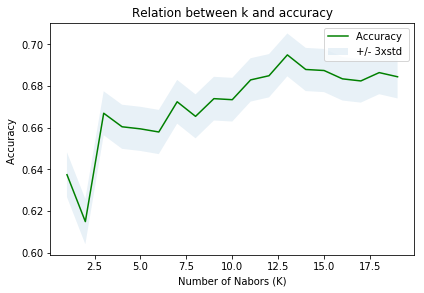

In [199]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc -1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy ','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.title('Relation between k and accuracy')
plt.savefig('k.png',dip=300)
plt.show()


From the figure, we can see that k=12 has the highest accuracy which is 69.5%.

In [197]:
k=12
neigh_bst = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh_bst.predict(X_test)
knn_acc = metrics.accuracy_score(y_test,yhat)

In [200]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
f1n = f1_score(y_test,yhat,average='weighted')
jan = jaccard_similarity_score(y_test,yhat)

In [203]:
report = pd.DataFrame(data=np.array([['KNN(k=12)',jan,f1n]]),
                      columns=['Algorithm','Jaccard','F1-score'])
report=report.set_index(['Algorithm','Jaccard','F1-score'])
report
                                     

,,
Algorithm,Jaccard,F1-score
KNN(k=12),0.685,0.6849747983870969
